In [1]:
import pandas as pd

In [186]:
filename = './tongxiang.xlsx'
df = pd.read_excel(filename)
print(df.columns)

Index(['桐庐县重点老年人探访关爱情况记录表', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')


In [187]:
df.columns = ['序号','姓名','性别','年龄','孤寡老人','独居老人','空巢老人','分散供养特困老人','享受失能失智照料服务电子津贴老人','享受高龄普惠服务电子津贴老人','享受智慧养老服务老人','其他兜底保障老人','房屋是否顾在安全隐患','电器电线是否存在安全隐患','是否有眼化头晕无力食欲不振等现象','是否有跌倒皮骨伤疼痛生病等情况','是否需要安装燃气报警器','是否缺少防暑必须品联系人及电话','地点','']

In [188]:
df=df.drop([0,1,2])

In [189]:
df

,序号,姓名,性别,年龄,孤寡老人,独居老人,空巢老人,分散供养特困老人,享受失能失智照料服务电子津贴老人,享受高龄普惠服务电子津贴老人,享受智慧养老服务老人,其他兜底保障老人,房屋是否顾在安全隐患,电器电线是否存在安全隐患,是否有眼化头晕无力食欲不振等现象,是否有跌倒皮骨伤疼痛生病等情况,是否需要安装燃气报警器,是否缺少防暑必须品联系人及电话,地点,
3,1,袁秀香,女,84,NaN,NaN,√,NaN,NaN,√,NaN,NaN,否,否,否,否,是,NaN,钟山村,NaN
4,2,麻金生,男,67,NaN,NaN,√,NaN,NaN,NaN,NaN,NaN,否,否,否,否,是,NaN,钟山村,NaN
5,3,麻湖美,女,61,NaN,NaN,√,NaN,NaN,NaN,NaN,NaN,否,否,否,否,是,NaN,钟山村,NaN
6,4,邹水花,女,91,NaN,NaN,√,NaN,NaN,√,NaN,NaN,否,否,否,否,是,NaN,钟山村,NaN
7,5,沈芝英,女,78,NaN,NaN,√,NaN,NaN,NaN,NaN,NaN,否,否,否,否,是,NaN,钟山村,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,902,姚邦道,男,93,√,NaN,NaN,NaN,NaN,√,NaN,低保,否,是,否,否,是,15906681861,大市村,NaN
905,903,姚正文,男,74,NaN,NaN,NaN,√,NaN,NaN,NaN,NaN,否,否,否,否,否,13606600846,大市村,NaN
906,904,王庆苗,男,76,NaN,NaN,√,NaN,NaN,NaN,NaN,NaN,否,否,否,否,否,13093702615,大市村,NaN
907,905,刘仙英,男,80,NaN,√,NaN,NaN,NaN,√,NaN,NaN,否,否,否,否,否,15957853086,大市村,NaN


In [190]:
df['年龄'] = pd.to_numeric(df['年龄'],errors='coerce')

In [191]:
mean_age = df['年龄'].mean()

In [192]:
print('平均年龄: '+str(mean_age))

平均年龄: 71.33885209713024


In [193]:
grouped=df.groupby('地点')['年龄'].mean()

In [194]:
print(grouped)

地点
中一村    68.781609
仕厦村    73.826923
城下村    74.739130
夏塘村    75.285714
大市村    74.750000
子胥村    78.285714
歌舞村    77.166667
钟山村    70.472149
陇西村    70.247863
高峰村    70.923077
魏丰村    78.222222
Name: 年龄, dtype: float64


In [195]:
df=df.replace('√',1).replace({'':0, ' ':0})

In [196]:
df=df.replace('是',1).replace({'否':0, ' ':0})

In [197]:
df=df.replace(1.0, True).replace({0.0:False})

In [198]:
df = df.fillna(False)

In [199]:
df=df.drop('', axis=1)

In [200]:
df

,序号,姓名,性别,年龄,孤寡老人,独居老人,空巢老人,分散供养特困老人,享受失能失智照料服务电子津贴老人,享受高龄普惠服务电子津贴老人,享受智慧养老服务老人,其他兜底保障老人,房屋是否顾在安全隐患,电器电线是否存在安全隐患,是否有眼化头晕无力食欲不振等现象,是否有跌倒皮骨伤疼痛生病等情况,是否需要安装燃气报警器,是否缺少防暑必须品联系人及电话,地点
3,True,袁秀香,女,84,False,False,True,False,False,True,False,False,False,False,False,False,True,False,钟山村
4,2,麻金生,男,67,False,False,True,False,False,False,False,False,False,False,False,False,True,False,钟山村
5,3,麻湖美,女,61,False,False,True,False,False,False,False,False,False,False,False,False,True,False,钟山村
6,4,邹水花,女,91,False,False,True,False,False,True,False,False,False,False,False,False,True,False,钟山村
7,5,沈芝英,女,78,False,False,True,False,False,False,False,False,False,False,False,False,True,False,钟山村
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,902,姚邦道,男,93,True,False,False,False,False,True,False,低保,False,True,False,False,True,15906681861,大市村
905,903,姚正文,男,74,False,False,False,True,False,False,False,False,False,False,False,False,False,13606600846,大市村
906,904,王庆苗,男,76,False,False,True,False,False,False,False,False,False,False,False,False,False,13093702615,大市村
907,905,刘仙英,男,80,False,True,False,False,False,True,False,False,False,False,False,False,False,15957853086,大市村


In [201]:
lonely_elderly_count = df.groupby('地点')['孤寡老人'].sum()
lonely_elderly_sum = df['孤寡老人'].sum()
print("孤寡老人：\n"+str(lonely_elderly_count))
print("共有: "+str(lonely_elderly_sum))

孤寡老人：
地点
中一村     8
仕厦村     0
城下村    16
夏塘村     2
大市村     3
子胥村     1
歌舞村     2
钟山村    19
陇西村     2
高峰村     4
魏丰村     2
Name: 孤寡老人, dtype: int64
共有: 59


In [202]:
alone_elderly_count = df.groupby('地点')['独居老人'].sum()
alone_elderly_sum = df['独居老人'].sum()
print("独居老人：\n"+str(alone_elderly_count))
print("共有: "+str(alone_elderly_sum))


独居老人：
地点
中一村    25
仕厦村    11
城下村    76
夏塘村    11
大市村     5
子胥村     6
歌舞村    10
钟山村    78
陇西村    18
高峰村     9
魏丰村    31
Name: 独居老人, dtype: int64
共有: 280


In [203]:
empty_nest_count = df.groupby('地点')['空巢老人'].sum()
empty_nest_sum = df['空巢老人'].sum()
print("空巢老人\n"+str(empty_nest_count))
print("共有: "+str(empty_nest_sum))

空巢老人
地点
中一村    141
仕厦村     38
城下村      0
夏塘村      1
大市村      1
子胥村      0
歌舞村      0
钟山村    279
陇西村     98
高峰村      0
魏丰村      3
Name: 空巢老人, dtype: int64
共有: 561


In [204]:
decentralized_count = df.groupby('地点')['分散供养特困老人'].sum()
decentralized_sum = df['分散供养特困老人'].sum()
print("分散供养特困老人\n"+str(decentralized_count))
print("共有: "+str(decentralized_sum))

分散供养特困老人
地点
中一村     7
仕厦村     2
城下村    11
夏塘村     2
大市村     3
子胥村     0
歌舞村     1
钟山村    11
陇西村     2
高峰村     4
魏丰村     3
Name: 分散供养特困老人, dtype: int64
共有: 46


In [205]:
subsidy_count = df.groupby('地点')['享受失能失智照料服务电子津贴老人'].sum()
subsidy_sum = df['享受失能失智照料服务电子津贴老人'].sum()
print("失能失智照料服务电子津贴\n"+str(subsidy_count))
print("共有: "+str(subsidy_sum))

失能失智照料服务电子津贴
地点
中一村    0
仕厦村    0
城下村    0
夏塘村    0
大市村    0
子胥村    0
歌舞村    0
钟山村    0
陇西村    0
高峰村    0
魏丰村    0
Name: 享受失能失智照料服务电子津贴老人, dtype: int64
共有: 0


In [206]:
subsidy_2_count = df.groupby('地点')['享受高龄普惠服务电子津贴老人'].sum()
subsidy_2_sum = df['享受高龄普惠服务电子津贴老人'].sum()
print("享受高龄普惠服务电子津贴老人\n"+str(subsidy_2_count))
print("共有: "+str(subsidy_2_sum))

享受高龄普惠服务电子津贴老人
地点
中一村     7
仕厦村     9
城下村    28
夏塘村     3
大市村     2
子胥村     3
歌舞村     5
钟山村    44
陇西村     6
高峰村     1
魏丰村    17
Name: 享受高龄普惠服务电子津贴老人, dtype: int64
共有: 125


In [207]:

smart_count = df.groupby('地点')['享受智慧养老服务老人'].sum()
smart_sum = df['享受智慧养老服务老人'].sum()
print("享受智慧养老服务老人\n"+str(smart_count))
print("共有: "+str(smart_sum))

享受智慧养老服务老人
地点
中一村    0
仕厦村    0
城下村    0
夏塘村    0
大市村    0
子胥村    0
歌舞村    0
钟山村    0
陇西村    0
高峰村    0
魏丰村    0
Name: 享受智慧养老服务老人, dtype: int64
共有: 0


In [208]:
df['其他兜底保障老人'].value_counts()
# other_count = df.groupby('地点')['其他兜底保障老人'].sum()
# other_sum = df['其他兜底保障老人'].sum()
# print("其他兜底保障老人\n"+str(other_count))
# print("共有: "+str(other_sum))

其他兜底保障老人
False    859
低保        20
True      14
特困        10
残保         2
低收入        1
Name: count, dtype: int64

In [209]:
house_count = df.groupby('地点')['房屋是否顾在安全隐患'].sum()
house_sum = df['房屋是否顾在安全隐患'].sum()
print("房屋是否顾在安全隐患\n"+str(house_count))
print("共有: "+str(house_sum))

房屋是否顾在安全隐患
地点
中一村    0
仕厦村    0
城下村    0
夏塘村    0
大市村    0
子胥村    0
歌舞村    0
钟山村    0
陇西村    0
高峰村    0
魏丰村    0
Name: 房屋是否顾在安全隐患, dtype: int64
共有: 0


In [210]:
df=df.replace('电线存在隐患',True)
electrical_count = df.groupby('地点')['电器电线是否存在安全隐患'].sum()
electrical_sum = df['电器电线是否存在安全隐患'].sum()
print("电器电线是否存在安全隐患\n"+str(electrical_count))
print("共有: "+str(electrical_sum))

电器电线是否存在安全隐患
地点
中一村    0
仕厦村    0
城下村    0
夏塘村    0
大市村    1
子胥村    0
歌舞村    3
钟山村    1
陇西村    0
高峰村    0
魏丰村    1
Name: 电器电线是否存在安全隐患, dtype: int64
共有: 6


In [211]:

head_count = df.groupby('地点')['是否有眼化头晕无力食欲不振等现象'].sum()
head_sum = df['是否有眼化头晕无力食欲不振等现象'].sum()
print("是否有眼化头晕无力食欲不振等现象\n"+str(head_count))
print("共有: "+str(head_sum))

是否有眼化头晕无力食欲不振等现象
地点
中一村    0
仕厦村    0
城下村    0
夏塘村    0
大市村    0
子胥村    0
歌舞村    0
钟山村    0
陇西村    0
高峰村    1
魏丰村    0
Name: 是否有眼化头晕无力食欲不振等现象, dtype: int64
共有: 1


In [212]:

Fall_related_count = df.groupby('地点')['是否有跌倒皮骨伤疼痛生病等情况'].sum()
Fall_related_sum = df['是否有跌倒皮骨伤疼痛生病等情况'].sum()
print("是否有跌倒皮骨伤疼痛生病等情况\n"+str(Fall_related_count))
print("共有: "+str(Fall_related_sum))

是否有跌倒皮骨伤疼痛生病等情况
地点
中一村     0
仕厦村     0
城下村     0
夏塘村     0
大市村     0
子胥村     0
歌舞村     1
钟山村    20
陇西村     0
高峰村     3
魏丰村     2
Name: 是否有跌倒皮骨伤疼痛生病等情况, dtype: int64
共有: 26


In [213]:
gas_count = df.groupby('地点')['是否需要安装燃气报警器'].sum()
gas_sum = df['是否需要安装燃气报警器'].sum()
print("是否需要安装燃气报警器\n"+str(gas_count))
print("共有: "+str(gas_sum))

是否需要安装燃气报警器
地点
中一村    174
仕厦村     52
城下村     92
夏塘村     14
大市村      1
子胥村      6
歌舞村      5
钟山村    377
陇西村    117
高峰村      0
魏丰村      1
Name: 是否需要安装燃气报警器, dtype: int64
共有: 839


In [214]:
df['是否缺少防暑必须品联系人及电话'].value_counts()

是否缺少防暑必须品联系人及电话
False             403
15968139008        12
13575726098         8
麻根青13456797932      4
滕雪根13116792855      4
                 ... 
13045711208         1
13003665258         1
13967162308         1
18258164900         1
15858127048         1
Name: count, Length: 407, dtype: int64

In [215]:
df['性别'].value_counts()

性别
男     461
女     442
男       3
Name: count, dtype: int64

In [216]:
sex_count = df.groupby('地点')['性别'].sum()
# sex_sum = df['性别'].sum()
# print("性别\n"+str(sex_count))
# print("共有: "+str(sex_sum))
sex_man = df.groupby('地点')['性别'].value_counts()
sex_sum = df['性别'].value_counts()
print(sex_man)
print(sex_sum)

地点   性别
中一村  男      95
     女      79
仕厦村  男      27
     女      25
城下村  女      55
     男      37
夏塘村  女      12
     男       2
大市村  男      11
     女       1
子胥村  男       4
     女       3
歌舞村  女       8
     男       4
钟山村  男     199
     女     175
     男       3
陇西村  男      62
     女      55
高峰村  男       9
     女       4
魏丰村  女      25
     男      11
Name: count, dtype: int64
性别
男     461
女     442
男       3
Name: count, dtype: int64


In [217]:
df['地点'].value_counts()

地点
钟山村    377
中一村    174
陇西村    117
城下村     92
仕厦村     52
魏丰村     36
夏塘村     14
高峰村     13
歌舞村     12
大市村     12
子胥村      7
Name: count, dtype: int64

In [218]:
total_count = df.count()['地点']
total_count
# total_count = df.count().sum()

906

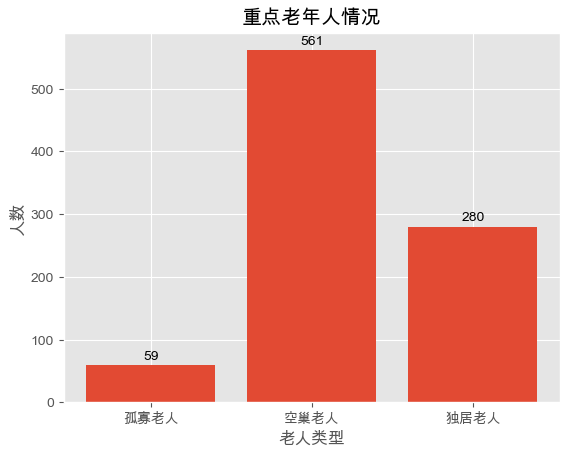

In [224]:
# 选择“孤寡老人”和“空巢老人”两列，生成新的 DataFrame
sub_df = df[['孤寡老人', '空巢老人','独居老人', '分散供养特困老人']]

# 统计“孤寡老人”和“空巢老人”的人数
num_solitary = sub_df['孤寡老人'].sum()
num_empty = sub_df['空巢老人'].sum()
num_alone = sub_df['独居老人'].sum()
# num_3 = sub_df['分散供养特困老人'].sum()

# 在柱上添加数字
for i, v in enumerate([num_solitary, num_empty, num_alone]):
    plt.text(i, v + 10, str(v), ha='center')

# 绘制柱状图
plt.bar(['孤寡老人', '空巢老人','独居老人'], [num_solitary, num_empty, num_alone])
plt.title('重点老年人情况')
plt.xlabel('老人类型')
plt.ylabel('人数')
plt.show()

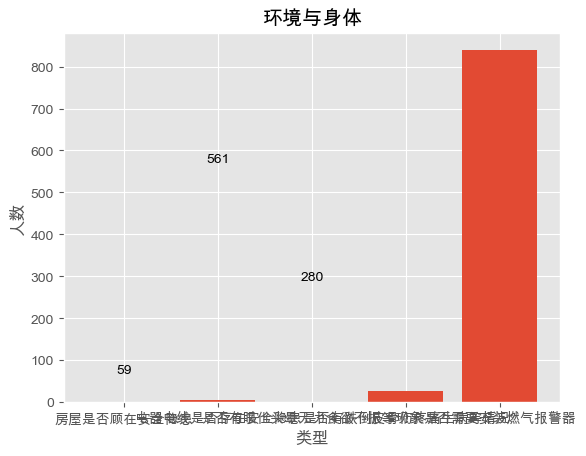

In [225]:
# 选择“孤寡老人”和“空巢老人”两列，生成新的 DataFrame
sub2_df = df[['房屋是否顾在安全隐患', '电器电线是否存在安全隐患','是否有眼化头晕无力食欲不振等现象', '是否有跌倒皮骨伤疼痛生病等情况','是否需要安装燃气报警器']]

# 统计“孤寡老人”和“空巢老人”的人数
num_0 = sub2_df['房屋是否顾在安全隐患'].sum()
num_1 = sub2_df['电器电线是否存在安全隐患'].sum()
num_2 = sub2_df['是否有眼化头晕无力食欲不振等现象'].sum()
num_3 = sub2_df['是否有跌倒皮骨伤疼痛生病等情况'].sum()
num_4 = sub2_df['是否需要安装燃气报警器'].sum()
# num_3 = sub_df['分散供养特困老人'].sum()

# 在柱上添加数字
for i, v in enumerate([num_solitary, num_empty, num_alone]):
    plt.text(i, v + 10, str(v), ha='center')

# 绘制柱状图
plt.bar(['房屋是否顾在安全隐患', '电器电线是否存在安全隐患','是否有眼化头晕无力食欲不振等现象', '是否有跌倒皮骨伤疼痛生病等情况', '是否需要安装燃气报警器'], [num_0, num_1, num_2, num_3, num_4])
plt.title('环境与身体')
plt.xlabel('类型')
plt.ylabel('人数')
plt.show()